In [ ]:
import pandas as pd

data = open('/content/ANERCorp_CamelLab_test.txt').readlines()
data2 = []
for line in data:
  data2.append(line.strip('\n').split(' '))

df = pd.DataFrame(data2, columns=['text', 'label'])

In [ ]:
# df.to_csv('test.csv', index=False)
df

,text,label
0,الصالحية,B-LOC
1,المفرق,B-LOC
2,-,O
3,غيث,B-PERS
4,الطراونة,I-PERS
...,...,...
25927,الشخصية,O
25928,للوليد,B-PERS
25929,بن,I-PERS
25930,طلال,I-PERS


In [ ]:
df=df[~df['label'].isna()]
df=df[~df['label'].isna()]

In [ ]:
import re
def non_arabic_ratio(line):
    arabic_chars = re.findall('[\u0600-\u06FF]+', line)
    arabic_len = sum(len(word) for word in arabic_chars)
    return (len(line) - arabic_len) / len(line)

In [ ]:
listt={'sentence':[],'label_str':[],'num_entities':[],'num_Words':[],'num_Chars':[],'labels':[],'ratio':[]}
sentence_List = pd.DataFrame(listt)
labels = []
all_labels = []
label_str = ""
num_entities = 0
num_Words = 0
num_Chars = 0
num_Sentences = 0
min_Len = 0
max_Len = 0
collected_sentence = ""
sentence = ""
i=0
for column, item in df.iterrows():
    # Access column name using 'column' and column values using 'values'
   

  if (item['text'] == '.' or item['text'] == '،'):
    ratio = 0
    if(len(collected_sentence) > 0):
      ratio = non_arabic_ratio(collected_sentence)
    else:
      ratio=0
    sentence_List.loc[len(sentence_List.index)] = [sentence, label_str, num_entities, num_Words, num_Chars, labels, ratio]

    collected_sentence=""
    sentence = ""
    num_entities = 0
    num_Words = 0
    num_Chars = 0
    labels =[]
    label_str = ""
  else:
    if (item['label'] !='O'):
      num_entities+=1
    if (item['label'] not in labels):
      labels.append(item['label'])
    label_str+=str(item['label'])+" "
    num_Chars += len(item['text'])
    sentence += item['text'] + " "
    num_Words+=1
    collected_sentence += item['text'] + " " + item['label'] + " "
    if(item['label'] not in all_labels):
      all_labels.append(item['label'])




/usr/local/lib/python3.10/dist-packages/pandas/core/dtypes/cast.py:948: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  element = np.asarray(element)


In [ ]:
all_labels

['B-LOC',
 'O',
 'B-PERS',
 'I-PERS',
 'B-ORG',
 'I-LOC',
 'I-ORG',
 'B-MISC',
 'I-MISC']

In [ ]:
sentence_List

,sentence,label_str,num_entities,num_Words,num_Chars,labels,ratio
0,الصالحية المفرق - غيث الطراونة - أمر جلالة الم...,B-LOC B-LOC O B-PERS I-PERS O O O O B-PERS I-P...,4,42,215,"[B-LOC, O, B-PERS, I-PERS]",0.440318
1,برند جلالته خلال اللقاء الذي جمعه وأعضاء اللجن...,B-PERS O O O O O O O O O O O O O O O O O O O O...,3,29,159,"[B-PERS, O, B-LOC]",0.386100
2,مرتفع جلالته أريد ان استمع منكم عن المشاريع ال...,O O O O O O O O O O O O O O O O,1,16,75,[O],0.390244
3,زادت جلالته على انه سوف يعود الى البادية الشما...,O O O O O O O O O O O O O O O O O O O O O,1,21,106,[O],0.372781
4,لصادرات جلالة الملك اطلق في ايار الماضي مبادرة...,O O O O O O O O O O O O O O O O O O O O O O O ...,1,26,133,[O],0.388626
...,...,...,...,...,...,...,...
1482,عام 2003,O O,1,2,7,[O],0.769231
1483,على جائزة أجمل تصميم لمبنىً برجي في العالم,O O O O O O O O,1,8,35,[O],0.406780
1484,الوزيرة ابن وابنة,O O O,1,3,15,[O],0.375000
1485,خالد وريم,B-PERS B-PERS,1,2,8,[B-PERS],0.666667


In [ ]:
num_entities_max = max(sentence_List['num_entities'])
num_Words_max = max(sentence_List['num_Words'])
num_Chars_max = max(sentence_List['num_Chars'])
ratio_max = max(sentence_List['ratio'])

print(num_entities_max,num_Words_max,num_Chars_max,ratio_max)

num_entities_min = min(sentence_List['num_entities'])
num_Words_min = min(sentence_List['num_Words'])
num_Chars_min = min(sentence_List['num_Chars'])
ratio_min = min(sentence_List['ratio'])

print(num_entities_min,num_Words_min,num_Chars_min,ratio_min)


7 97 465 1.0
0 0 0 0.0


<Axes: >

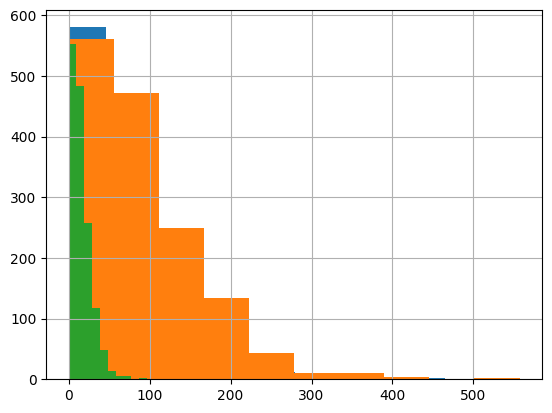

In [ ]:
sentence_List['num_Chars'].hist()
sentence_List['sentence'].str.len().hist()

sentence_List['num_Words'].hist()

<Axes: >

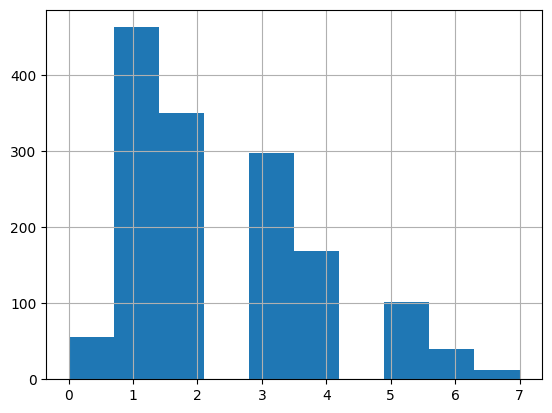

In [ ]:
sentence_List['labels'].str.len().hist()

<Axes: >

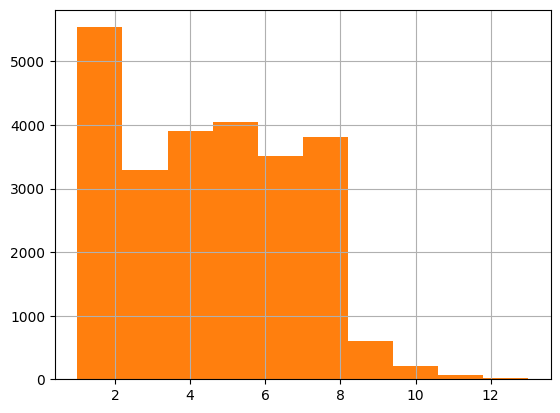

In [ ]:

import numpy as np

sentence_List['sentence'].str.split().apply(lambda x : [len(i) for i in x]).map(lambda x: np.mean(x)).hist()
# sentence_List['num_Words'].hist()
df['text'].str.len().hist()
  
# sentence_List['sentence'].np.mean().hist()

<Axes: >

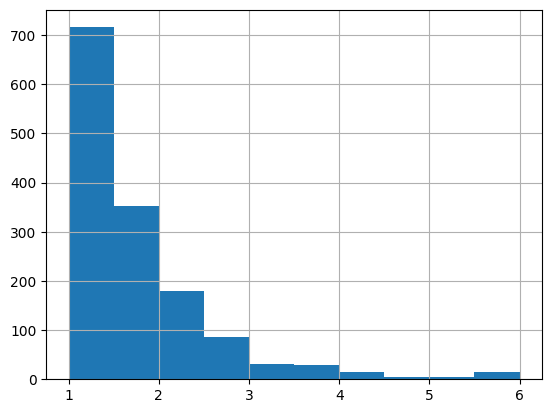

In [ ]:

import numpy as np
sentence_List['label_str'].str.split().apply(lambda x : [len(i) for i in x]).map(lambda x: np.mean(x)).hist()
# sentence_List['label_str'].np.mean(x).hist()